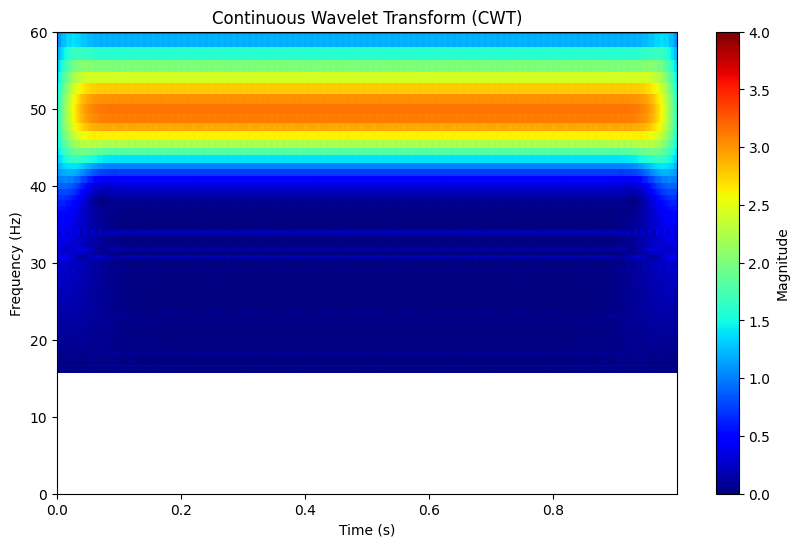

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 生成一个示例信号
fs = 1000  # 采样频率为1000 Hz
t = np.arange(0, 1, 1/fs)
f1 = 5  # 低频信号频率
f2 = 50  # 高频信号频率
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# 定义尺度
scales = np.arange(1, 128)

# 计算连续小波变换
coefficients, frequencies = pywt.cwt(signal, scales, 'cmor1-2', sampling_period=1/fs)

# 使用pcolormesh绘制结果
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, frequencies, np.abs(coefficients), shading='auto', cmap='jet', vmax=4, vmin=0)
plt.ylim(0,60)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Continuous Wavelet Transform (CWT)')
plt.show()

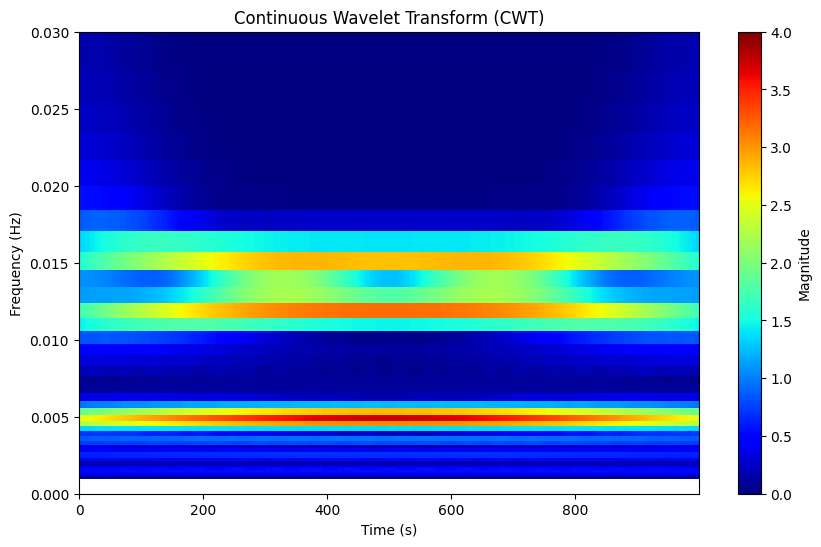

In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 生成一个示例信号
fs = 0.5  # 采样频率为0.5 Hz
t = np.arange(0, 1000, 1/fs)
f1 = 0.005  # 低频信号频率
f2 = 0.015  # 高频信号频率
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)  + np.sin(2 * np.pi * 0.012 * t)

# 定义尺度
frequencies = np.logspace(np.log10(1/1000), np.log10(50/1000))  # Frequencies of interest
scales = fs / frequencies   
# scales = np.arange(1, 1024, 2)

# 计算连续小波变换
coefficients, frequencies = pywt.cwt(signal, scales, 'cmor10-1', sampling_period=1/fs)

# 使用pcolormesh绘制结果
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, frequencies, np.abs(coefficients), shading='auto', cmap='jet', vmax=4, vmin=0)
plt.ylim(0,0.03)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Continuous Wavelet Transform (CWT)')
plt.show()

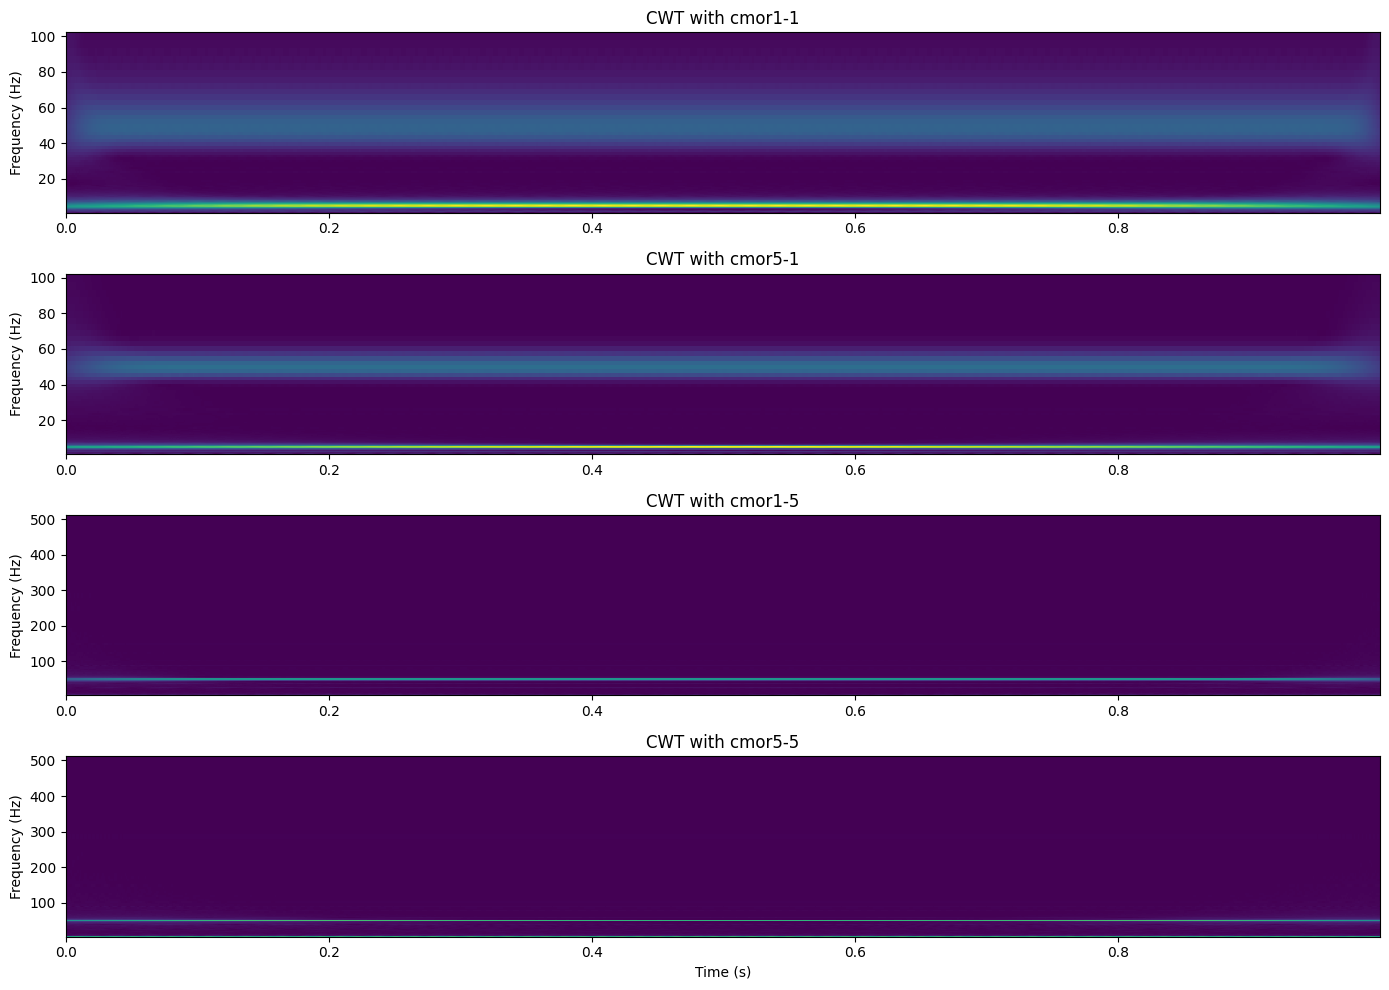

In [3]:
import numpy as np
import pywt

# 生成一个测试信号
fs = 1000  # 采样频率为1000 Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 生成时间数组
f1 = 5  # 第一个频率成分 5 Hz
f2 = 50  # 第二个频率成分 50 Hz
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)  # 生成信号

# 定义尺度
frequencies = np.logspace(np.log10(1), np.log10(100), 100)  # Frequencies of interest
scales = fs / frequencies  # 计算尺度

# 使用不同的cmor小波参数进行CWT
wavelet1 = 'cmor1-1'  # 带宽较宽，中心频率较低
wavelet2 = 'cmor5-1'  # 带宽较窄，中心频率较低
wavelet3 = 'cmor1-5'  # 带宽较宽，中心频率较高
wavelet4 = 'cmor5-5'  # 带宽较窄，中心频率较高

# 进行CWT
coefficients1, frequencies1 = pywt.cwt(signal, scales, wavelet1, sampling_period=1/fs)
coefficients2, frequencies2 = pywt.cwt(signal, scales, wavelet2, sampling_period=1/fs)
coefficients3, frequencies3 = pywt.cwt(signal, scales, wavelet3, sampling_period=1/fs)
coefficients4, frequencies4 = pywt.cwt(signal, scales, wavelet4, sampling_period=1/fs)

# 绘制CWT结果
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.pcolormesh(t, frequencies1, np.abs(coefficients1), shading='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.title(f'CWT with {wavelet1}')

plt.subplot(4, 1, 2)
plt.pcolormesh(t, frequencies2, np.abs(coefficients2), shading='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.title(f'CWT with {wavelet2}')

plt.subplot(4, 1, 3)
plt.pcolormesh(t, frequencies3, np.abs(coefficients3), shading='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.title(f'CWT with {wavelet3}')

plt.subplot(4, 1, 4)
plt.pcolormesh(t, frequencies4, np.abs(coefficients4), shading='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.title(f'CWT with {wavelet4}')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()